# Actividad: Regresión Lineal 2
## Tania Sayuri Guizado Hernandez A01640092
### **Regresión lineal múltiple**

Utiliza un modelo de regresión lineal múltiple para predecir el radio del tumor. Las variables regresoras de tu modelo deben de ser todas las variables de la base de datos.

*Importamos las librerías necesarias para el desarrollo  de la actividad.*

In [1]:
# Cargamos las librerias necesarias para la actividad
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as stats
df = pd.read_csv('breast_cancer.csv')
df.drop(['id','diagnosis','concave points_mean','concave points_se','concave points_worst'],axis=1,inplace=True)

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

#### 1.- Base de datos completa. No se observan valores faltantes. En caso de haberlos se realiza imputación simple.

*Confirmamos que la base de datos este completa y no contenga valores nulos. Ya que de lo contrario será necesario realizar una imputación de datos.*

In [2]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### 2.-Mostrar que las variables regresoras son independientes. En caso de no serlo realizar el procedimiento correspondiente.

*Guardamos la correlación y se verifica que no exista alta ni baja correlación entre las variables.*

In [3]:
# Guardar la correlacion
correlacion= df.corr()
# Verificamos la alta correlacion
alta_corr=np.where((correlacion>0.95)&(correlacion<1))
alta_corr

(array([ 0,  0,  0,  0,  2,  2,  2,  2,  3,  3,  3,  3,  3,  9,  9, 11, 12,
        18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 21, 21, 21], dtype=int64),
 array([ 2,  3, 18, 20,  0,  3, 18, 20,  0,  2, 18, 20, 21, 11, 12,  9,  9,
         0,  2,  3, 20, 21,  0,  2,  3, 18, 21,  3, 18, 20], dtype=int64))

In [4]:
# Verificamos la baja correlacion
baja_corr = np.where((correlacion < -0.95) & (correlacion > -1))
baja_corr

(array([], dtype=int64), array([], dtype=int64))

*En la matriz de correlación se aprecia mejor entre que variables se esta presentando tanto bajas como altas correlaciones.*

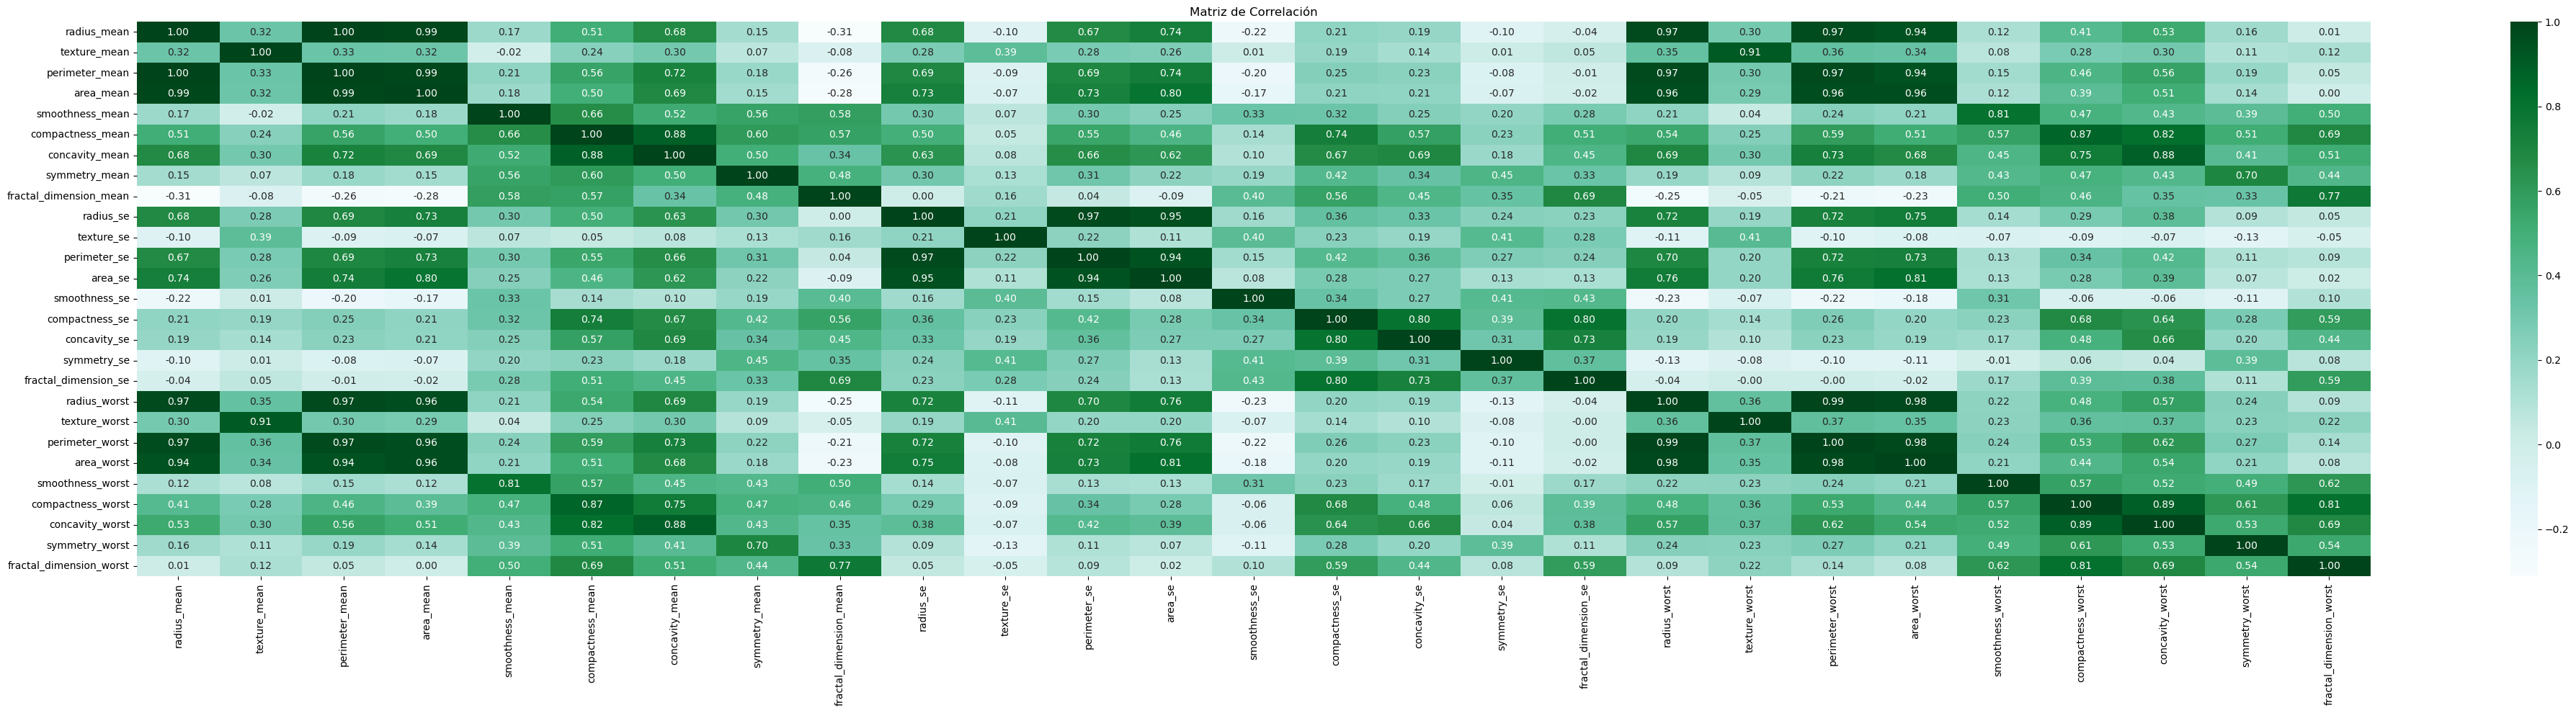

In [5]:
# Ploteamos la matriz de correlacion
plt.figure(figsize=(50, 10))
sns.heatmap(correlacion, annot=True, cmap="BuGn", fmt=".2f", linewidths=0)
plt.title("Matriz de Correlación")
plt.show()

*Como los datos mostraron alta correlación fue necesario hacer una estandarización de los datos*

In [6]:
# Estandarizacion de los datos
scaler = StandardScaler()
df_estandar=scaler.fit_transform(df)
df_estandar=pd.DataFrame(df_estandar,columns=df.columns)
columns_names = df.columns.values

In [7]:
#Entrenamiento y prueba del modelo
entrenamiento, prueba = train_test_split(df_estandar, test_size=0.2, random_state=42)

#Modelo OLS
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.611e+04
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:08:51   Log-Likelihood:                 1240.8
No. Observations:                 455   AIC:                            -2428.
Df Residuals:                     428   BIC:                            -2316.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

*Haciendo un análisis del anterior modelo, el valor del estadístico F es extremadamente alto y la probabilidad asociada cercana a cero indican que el modelo en su conjunto es estadísticamente significativo. Esto sugiere que al menos una de las variables independientes incluidas en el modelo tiene un impacto significativo en la variable dependiente (radius_mean). Aparte el valor R^2 es 1, o que indica que el modelo se ajusta perfectamente a los datos de entrenamiento.* 

#### 3.-Hipótesis nula de los coeficientes de regresión. Estadístico de prueba, distribución del estadístico de prueba.

Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

In [8]:
# Calcular los estadísticos t
nivel_de_confianza = 0.95
alpha2 = (1 - nivel_de_confianza) / 2
grados_de_libertad = len(entrenamiento) - 1
valor_critico_t = t.ppf(1 - alpha2, df=grados_de_libertad)

limite_inferior = -valor_critico_t
limite_superior = valor_critico_t

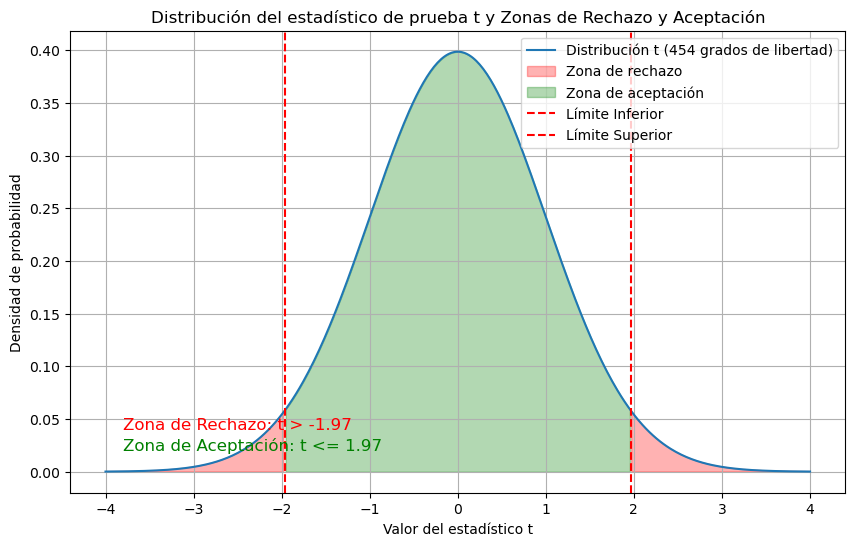

In [9]:
# Rango de valores para el estadístico t
rango_t = np.linspace(-4, 4, 400)
densidad_t = t.pdf(rango_t, df=grados_de_libertad)  # Distribución t-Student

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(rango_t, densidad_t, label=f'Distribución t ({grados_de_libertad} grados de libertad)')
plt.fill_between(rango_t, 0, densidad_t, where=(rango_t < limite_inferior) | (rango_t > limite_superior), color='red', alpha=0.3, label='Zona de rechazo')
plt.fill_between(rango_t, 0, densidad_t, where=(rango_t >= limite_inferior) & (rango_t <= limite_superior), color='green', alpha=0.3, label='Zona de aceptación')

# Agrega líneas verticales para el estadístico de prueba y los límites
plt.axvline(limite_inferior, color='red', linestyle='--', label='Límite Inferior')
plt.axvline(limite_superior, color='red', linestyle='--', label='Límite Superior')

# Etiquetas y leyenda
plt.title('Distribución del estadístico de prueba t y Zonas de Rechazo y Aceptación')
plt.xlabel('Valor del estadístico t')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid()

# Etiquetas en el gráfico
plt.text(-3.8, 0.04, f'Zona de Rechazo: t > {limite_inferior:.2f}', fontsize=12, color='red')
plt.text(-3.8, 0.02, f'Zona de Aceptación: t <= {limite_superior:.2f}', fontsize=12, color='green')

# Mostrar el gráfico
plt.show()

*Para este punto la prueba de hipótesis la realizamos con el estadístico de prueba y distribución t-Student. Tomando en consideración que teniamos que tener un nivel de confianza del 95% el calculo resultando del valor crítico fue de aproximadamente 1.9652 y este valor sería el que define la zona de rechazo y aceptación(-1.97,1.97) en la distribución t. En esta misma, con 454 grados de libertad, se asemeja una distribución normal estándar debido a la muestra tan grande de la base de datos de breast_cancer.*

*Sobre el gráfico que la curva asemeja una campana, los valores críticos de t se representan por los límites inferior y superior. Los valores del estadístico de prueba que se sitúan en la zona de rechazo (en rojo) muestran pruebas suficientes para refutar la hipótesis nula, mientras que los que se sitúan dentro de la zona de aceptación (en verde) no muestran pruebas significativas.*

#### 4.-Hipótesis nula de la significancia del modelo (prueba F-Fisher). Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

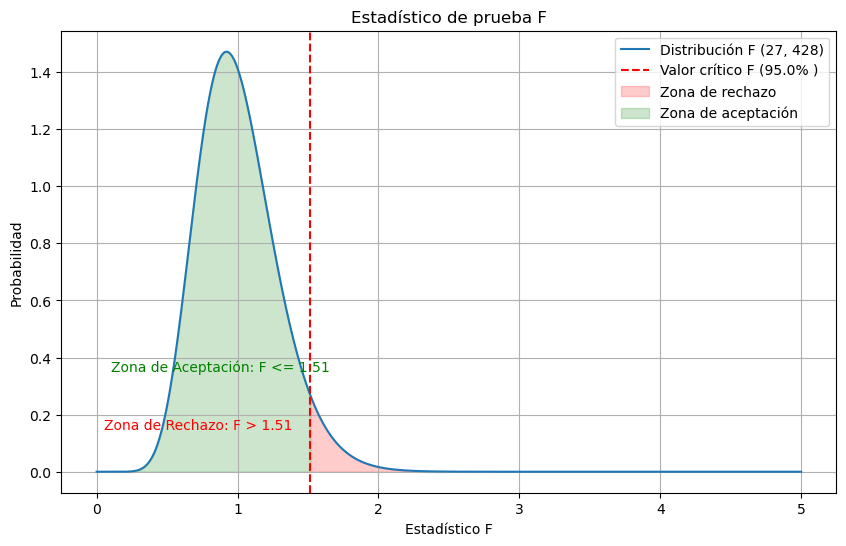

In [10]:
from scipy.stats import f
coeficientes = modelo.params
# Grados de libertad del modelo y del error
df_model = len(coeficientes)
df_error = len(entrenamiento) - len(coeficientes)

# Nivel de confianza
nivel_de_confianza = 0.95

# Valor crítico F para el nivel de confianza y grados de libertad
valor_critico_F = f.ppf(nivel_de_confianza, dfn=df_model, dfd=df_error)

rango_F = np.linspace(0, 5, 1000)
densidad_F = f.pdf(rango_F, dfn=df_model, dfd=df_error)

plt.figure(figsize=(10, 6))
plt.plot(rango_F, densidad_F, label=f'Distribución F ({df_model}, {df_error})')
plt.axvline(x=valor_critico_F, color='red', linestyle='--', label=f'Valor crítico F ({nivel_de_confianza * 100}% )')
plt.fill_between(rango_F, densidad_F, where=((rango_F > valor_critico_F)), color='red', alpha=0.2, label='Zona de rechazo')
plt.fill_between(rango_F, densidad_F, where=((rango_F <= valor_critico_F)), color='green', alpha=0.2, label='Zona de aceptación')

plt.title('Estadístico de prueba F')
plt.xlabel('Estadístico F')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid()

plt.text(0.05, 0.15, f'Zona de Rechazo: F > {valor_critico_F:.2f}', fontsize=10, color='red')
plt.text(0.1, 0.35, f'Zona de Aceptación: F <= {valor_critico_F:.2f}', fontsize=10, color='green')

plt.show()

*En este caso para el estadísitico de prueba F y su distribución hubo 27 grados de libertad en el modelo y 428 en el error. Considerando el solicitado de nivel de confiaza del 95% el valor crítico F fue de aproximadamente 1.512. En el gráfico solo se muestra la cola derecha, que suele ser típica en este estadístico y sus valores del mismo mayores al valor crítico deberán caer en la zona de rechazo (inidcaran que al menos una vriable independiente es significativa) mientras que los valores menores caen en la zona de aceptación (afirmando que las variables no son significativas).*

#### 5.- Realiza un modelo de regresión hacia atrás (backward). Explica el criterio para ir eliminando variables del modelo.

*Explicando un poco mejor el modelo de regresión backward, en pocas palabras, es una técnica utilizada para simplificar un modelo de regresión múltiple eliminando gradualmente las variables predictoras que tienen un impacto menos significativo en la predicción de la variable dependiente. Su significancia se evalúa si su p-valor es mayor a 0.05.*

En cada paso, **se eliminará la variable independiente** *menos significativa*, y el modelo se ajustará nuevamente sin esa variable. 

In [11]:
# Tomamos las variables para X y Y en nuestro modelo de regresion backward
df_estandar['intercept'] = 1
X = df_estandar[[ 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst',
    'fractal_dimension_worst']]
Y = df_estandar['radius_mean']

modelo2 = sm.OLS(Y, X).fit()

while any(modelo2.pvalues > 0.05):
    variable_menos_significativa = modelo2.pvalues.idxmax()
    X = X.drop(variable_menos_significativa, axis=1)
    modelo2 = sm.OLS(Y, X).fit()
    print(color.BOLD + '\n--- La variable eliminada fue: '+ color.BLUE + variable_menos_significativa + color.END)
    print('\n')
    print(modelo2.summary())


--- La variable eliminada fue: texture_worst


                                 OLS Regression Results                                
Dep. Variable:            radius_mean   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.357e+04
Date:                Sat, 16 Sep 2023   Prob (F-statistic):                        0.00
Time:                        00:08:52   Log-Likelihood:                          1528.7
No. Observations:                 569   AIC:                                     -3009.
Df Residuals:                     545   BIC:                                     -2905.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|     

#### 6.-Comparación entre datos reales y predicción. Análisis de los resultados.

*El modelo de regresión múltiple muestra un R-squared perfecto, lo que indico que el modelo se ajusta perfectamente a los datos, asi mismo se puede determinar que los coeficientes de las variables independientes son todos significativos.*

*A continuación este análisis encaja en veracidad, al ver como la gráfica de valores de predicción y valores reales se alinea con la línea roja porque esto significa que el modelo de regresión está haciendo predicciones muy precisas y que los valores predichos son prácticamente idénticos a los valores reales. También se realiza el grafico e histograma de los residuos.*

In [12]:
y_aprox=modelo2.params[0]*prueba['perimeter_mean']+modelo2.params[1]*prueba['area_mean']+modelo2.params[2]*prueba['smoothness_mean']+modelo2.params[3]*prueba['compactness_mean']+modelo2.params[4]*prueba['concavity_mean']+modelo2.params[5]*prueba['perimeter_se']+modelo2.params[6]*prueba['smoothness_se']+modelo2.params[7]*prueba['concavity_se']+modelo2.params[8]*prueba['radius_worst']+modelo2.params[9]*prueba['perimeter_worst']+modelo2.params[10]*prueba['area_worst']+modelo2.params[11]*prueba['smoothness_worst']+modelo2.params[12]*prueba['compactness_worst']
tabla=pd.DataFrame({'Real': prueba['radius_mean'], 'Prediccion': y_aprox, 'Errores': prueba['radius_mean']-y_aprox})

Text(0, 0.5, 'Predicción')

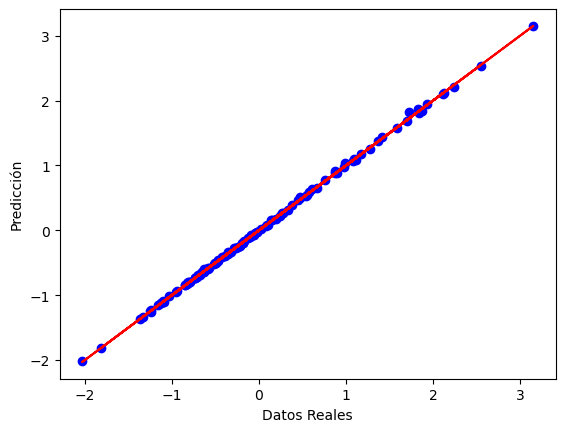

In [13]:
plt.scatter(prueba['radius_mean'], y_aprox, color='blue')
plt.plot(prueba['radius_mean'],prueba['radius_mean'], color='red')
plt.xlabel("Datos Reales")
plt.ylabel("Predicción")

Text(0, 0.5, 'Valor del residuo')

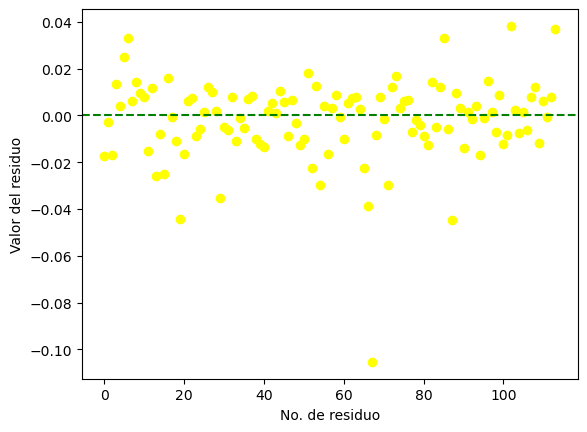

In [14]:
plt.scatter(range(tabla.shape[0]),tabla['Errores'], color='yellow')
plt.axhline(y=0, linestyle='--', color='green')
plt.xlabel("No. de residuo")
plt.ylabel("Valor del residuo")

Text(0, 0.5, 'Frecuencia (Probabilidad)')

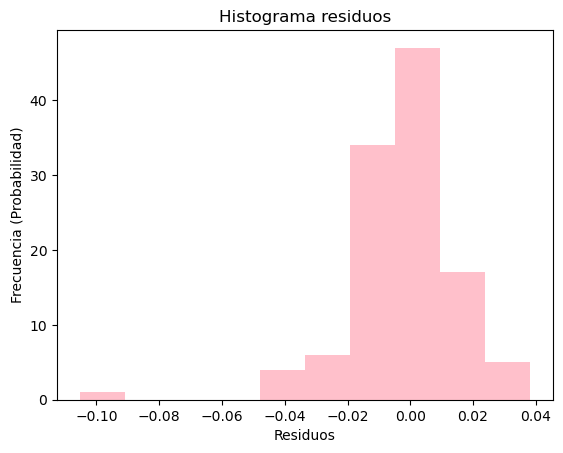

In [15]:
plt.hist(x=tabla['Errores'], color='pink')
plt.title('Histograma residuos')
plt.xlabel("Residuos")
plt.ylabel("Frecuencia (Probabilidad)")